In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Load in the world shapefile

world_data = gpd.read_file(r'/home/mick/QGIS_data/world.shp')
world_data = world_data[['NAME', 'AREA', 'geometry']]
# world_data.plot()

In [3]:
# Calculate the area of the individual countries

world_data.to_crs(epsg = 3857, inplace = True)
world_data['Area2'] = world_data.area

In [4]:
# Remove Antarctica from the geopandas geodataframe

world_data = world_data[world_data['NAME'] != 'Antarctica']
# world_data.plot()

<AxesSubplot: >

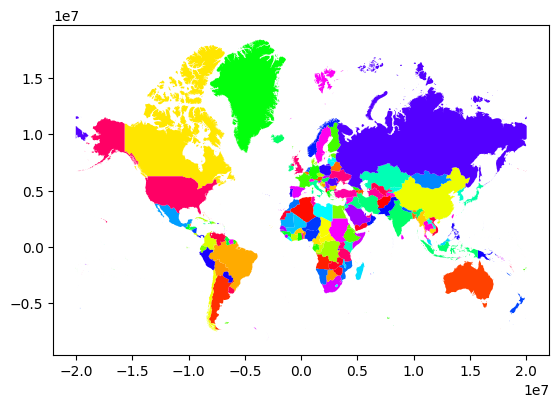

In [5]:
# Change the projection

# current_crs = world_data.crs
world_data.to_crs(epsg = 3857, inplace = True)
world_data.plot(column = 'NAME', cmap = 'hsv')

In [6]:
# Re-calculate the individual countries area to Sq. Km

world_data['Area2'] = (world_data.area / 1000000)

In [7]:
world_data.head()

,NAME,AREA,geometry,Area2
0,Antigua and Barbuda,44,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",5.993606e+02
1,Algeria,238174,"POLYGON ((329907.556 4411573.988, 331886.705 4...",3.014479e+06
2,Azerbaijan,8260,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",1.478874e+05
3,Albania,2740,"POLYGON ((2163629.445 5015449.243, 2165225.767...",5.062603e+04
4,Armenia,2820,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",5.104906e+04


<AxesSubplot: >

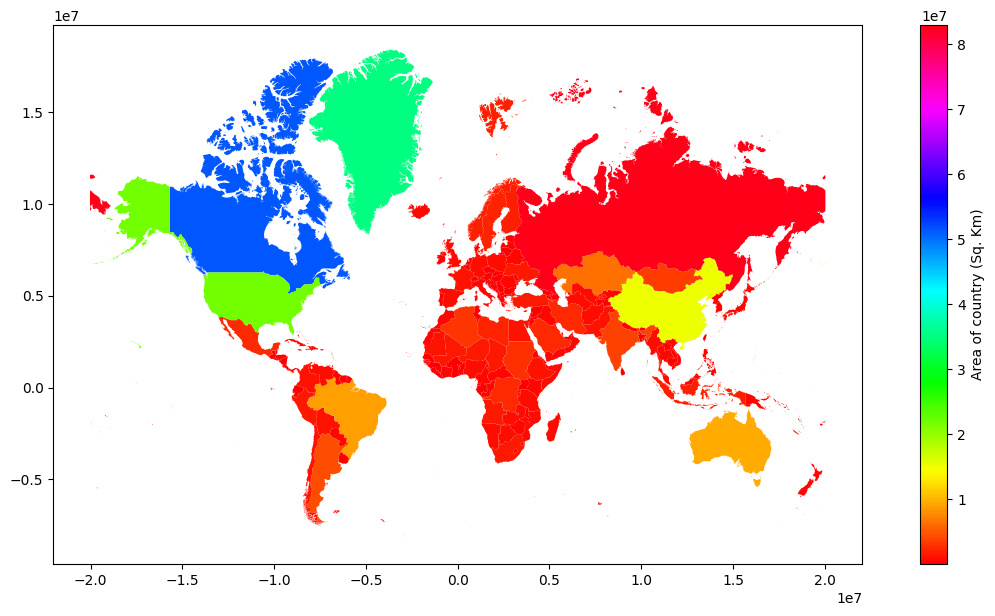

In [8]:
# Adding a legend

world_data.plot(column = 'Area2', cmap = 'hsv', legend = True, 
                legend_kwds = {'label': 'Area of country (Sq. Km)'}, figsize = (15, 7))

<AxesSubplot: >

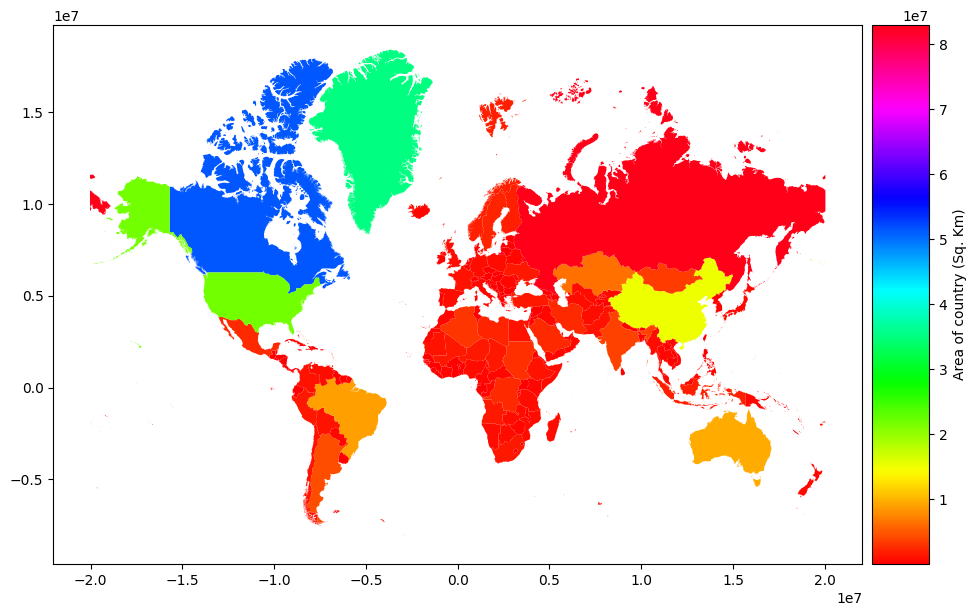

In [9]:
# Resizing the legend

fig, ax = plt.subplots(figsize = (15, 7))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '7%', pad = 0.1)
world_data.plot(column = 'Area2', cmap = 'hsv', legend = True, 
                legend_kwds = {'label': 'Area of country (Sq. Km)'},
                ax = ax, cax = cax)